# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentation
- El trabajo debe tener una extensión máxima de 8 páginas (no se permite Apéndice). Se espera una buena redacción en la resolución del práctico.
- El informe debe ser entregado en formato PDF, con los gráficos e imágenes en este mismo archivo.
- Entregar el código con los comandos utilizados, identificando claramente a qué inciso corresponde cada comando.

### Fecha de entrega:
Miércoles 2 de octubre a las 23:59 hs.

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte I: Limpieza de la base

#### Ejercicio 1
La base de datos provista contiene información sobre oferentes de Airbnb en la ciudad de Nueva York. Realicen una limpieza de la base.
- Tengan en cuenta si hay valores duplicados y eliminénlos.
- Eliminen las columnas que no tienen información de interés.
- (Opcional) Luego de leer el artículo __[Missing-data imputation](https://bookdown.org/mike/data_analysis/imputation-missing-data.html##imputation-missing-data)__ (__[Missing-data imputation articulo alternativo](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)__), decidan qué hacer con los missing values e implementen su decision. Justifiquen su eleccion. Pueden usar informacion del paper mencionado o de otras fuentes (citenlas si las usan) para explicar los problemas que pueden surgir por su estrategia elegida.
- Si hay observaciones con *outliers* o valores que no tienen sentido, tomen una decision. Expliquen las decisiones tomadas.
- Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.
- Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna <code>offer group</code>

In [2]:
# Resolver acá
import os
import pandas as pd
import matplotlib 
#os.chdir('C:/Users/Nacha/OneDrive/Desktop/Anaconda')
os.chdir('c:/Flor/UDESA/Primavera 2024/Ciencia de datos/TP2/TP2')

In [3]:
airbnb = pd.read_csv('Base Airbnb NY.csv')
airbnb = airbnb.drop(['name', 'host_id', 'host_name', 'last_review'], axis = 1)
airbnb = airbnb.drop_duplicates(subset = 'id', keep = 'first')
# Missing values: como los NaN que aparecian correspondian con que en el number_of_reviews era 0, significa que hay 0 reviews_per_months. Por lo tanto, decidimos reemplazar esos NaN por 0.
airbnb['reviews_per_month'] = airbnb['reviews_per_month'].fillna(0)
airbnb = airbnb[airbnb['availability_365'] >= 0] #hicimos esto porque en el histograma de availability estaba raro porque tenia valores negativos q no tenian sentido porque disponibilidad nopuede ser neg
airbnb

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355
2,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,0.00,1,365
3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,4.64,1,194
4,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,0.00,2,9
48891,36485057,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,0.00,2,36
48892,36485431,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,0.00,1,27
48893,36485609,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,0.00,6,2


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>],
       [<Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>]], dtype=object)

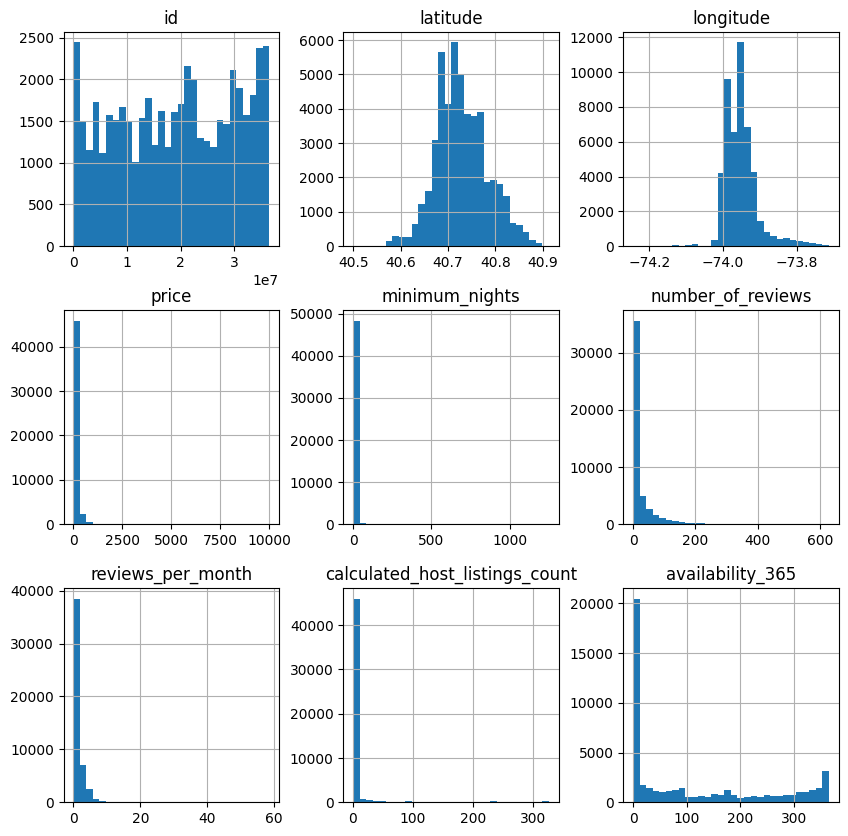

In [4]:
airbnb.hist(figsize = (10,10), bins = 30)

In [5]:
import numpy as np
#transformamos las columnas necesarias a log 
# Columnas a las que aplicar logaritmo
columnas_log = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# Aplicar logaritmo a las columnas seleccionadas
#airbnb[columnas_log] = np.log(airbnb[columnas_log])
#airbnb


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>],
       [<Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>]], dtype=object)

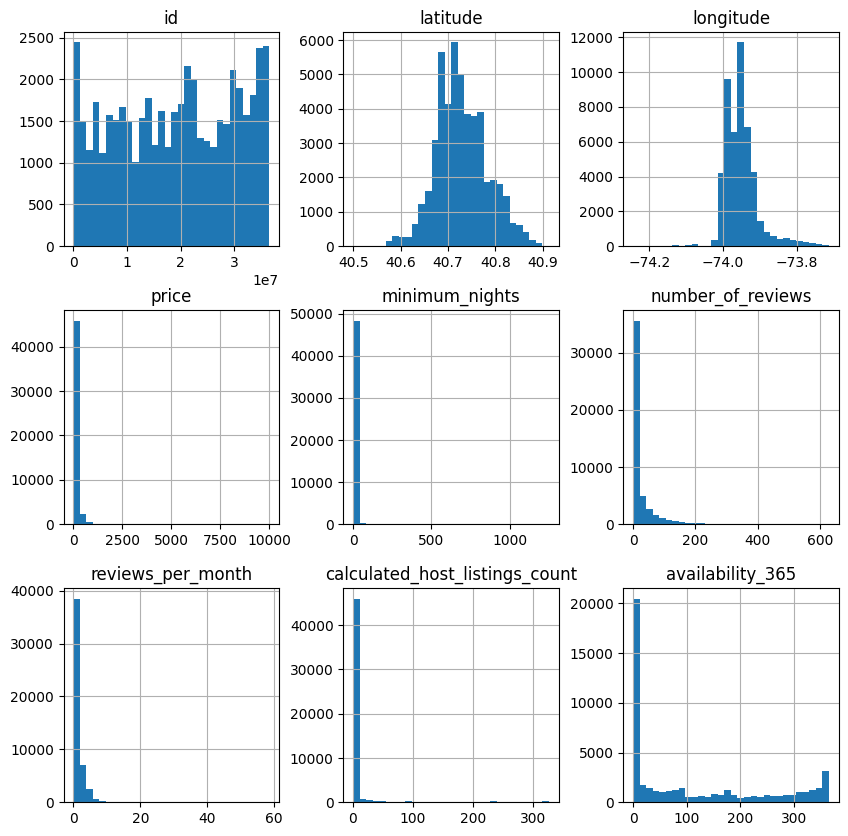

In [6]:
airbnb.hist(figsize = (10,10), bins = 30)

In [7]:
# outliers y valores que no tienen sentido
# ya tomamos una decisione n cuanto a los negativos de availability y la fecha de de last review



 Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.

In [8]:
#son 5 grupos de barrios y 3 tipos de cuarto
# Paso 1: Definir el orden manualmente para la variable 'room_type'
room_type_order = {
    'Shared room': 0,       # Menor valor
    'Private room': 1,      # Valor intermedio
    'Entire home/apt': 2    # Mayor valor
}

# Paso 2: Asignar los valores numéricos según el orden definido
airbnb['room_type_num'] = airbnb['room_type'].map(room_type_order)

# Verificar los valores únicos de 'room_type' y sus asignaciones
print(airbnb[['room_type', 'room_type_num']])



             room_type  room_type_num
0         Private room              1
1      Entire home/apt              2
2         Private room              1
3      Entire home/apt              2
4      Entire home/apt              2
...                ...            ...
48890     Private room              1
48891     Private room              1
48892  Entire home/apt              2
48893      Shared room              0
48894     Private room              1

[48880 rows x 2 columns]


In [9]:
#son 5 grupos de barrios y 3 tipos de cuarto
# Paso 1: Definir el orden manualmente para la variable 'neighbourhood_type'
neighbourhood_group_order = {
    'Staten Island': 0,       # Menor valor
    'Bronks': 1,      
    'Queens': 2,           # Valor intermedio
    'Brooklyn': 3,
    'Manhattan': 4       # Mayor valor
}

# Paso 2: Asignar los valores numéricos según el orden definido
airbnb['neighbourhood_group_num'] = airbnb['neighbourhood_group'].map(neighbourhood_group_order)

# Verificar los valores únicos de 'room_type' y sus asignaciones
print(airbnb[['neighbourhood_group', 'neighbourhood_group_num']])

      neighbourhood_group  neighbourhood_group_num
0                Brooklyn                      3.0
1               Manhattan                      4.0
2               Manhattan                      4.0
3                Brooklyn                      3.0
4               Manhattan                      4.0
...                   ...                      ...
48890            Brooklyn                      3.0
48891            Brooklyn                      3.0
48892           Manhattan                      4.0
48893           Manhattan                      4.0
48894           Manhattan                      4.0

[48880 rows x 2 columns]


In [10]:
#- Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna <code>offer group</code>
#agrupar por 'neighbourhood_group' y contar la cantidad de oferentes por cada grupo
offer_count = airbnb.groupby('neighbourhood_group').size().reset_index(name='offer_group')

# Paso 2: Hacer un merge o join con el DataFrame original para añadir la columna 'offer_group'
airbnb = airbnb.merge(offer_count, on='neighbourhood_group', how='left')
print(offer_count)
airbnb




  neighbourhood_group  offer_group
0               Bronx         1090
1            Brooklyn        20096
2           Manhattan        21659
3              Queens         5662
4       Staten Island          373


,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_num,neighbourhood_group_num,offer_group
0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365,1,3.0,20096
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355,2,4.0,21659
2,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,0.00,1,365,1,4.0,21659
3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,4.64,1,194,2,3.0,20096
4,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,0.10,1,0,2,4.0,21659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48875,36484665,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,0.00,2,9,1,3.0,20096
48876,36485057,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,0.00,2,36,1,3.0,20096
48877,36485431,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,0.00,1,27,2,4.0,21659
48878,36485609,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,0.00,6,2,0,4.0,21659


### Parte II: Graficos y visualizaciones

#### Ejercicio 2
Una vez hecha la limpieza, realicen una matriz de correlación con las siguientes variables:**‘neighbourhood group’, ‘latitude’, ‘longitude’, ‘room type’,‘price’, ‘minimum nights’, ‘number of reviews’, ‘reviews per month’,‘calculated host listings count’, ‘availability 365’.** Comenten los resultados. Utilicen alguno de los comandos disponibles en este link para graficar la matriz de correlacion.

*Nota:* consideren cómo es conveniente incluir las variables que originalmente eran categóricas para poder interpretar mejor la matriz de correlación.

Text(0.5, 1.0, 'Correlation matrix')

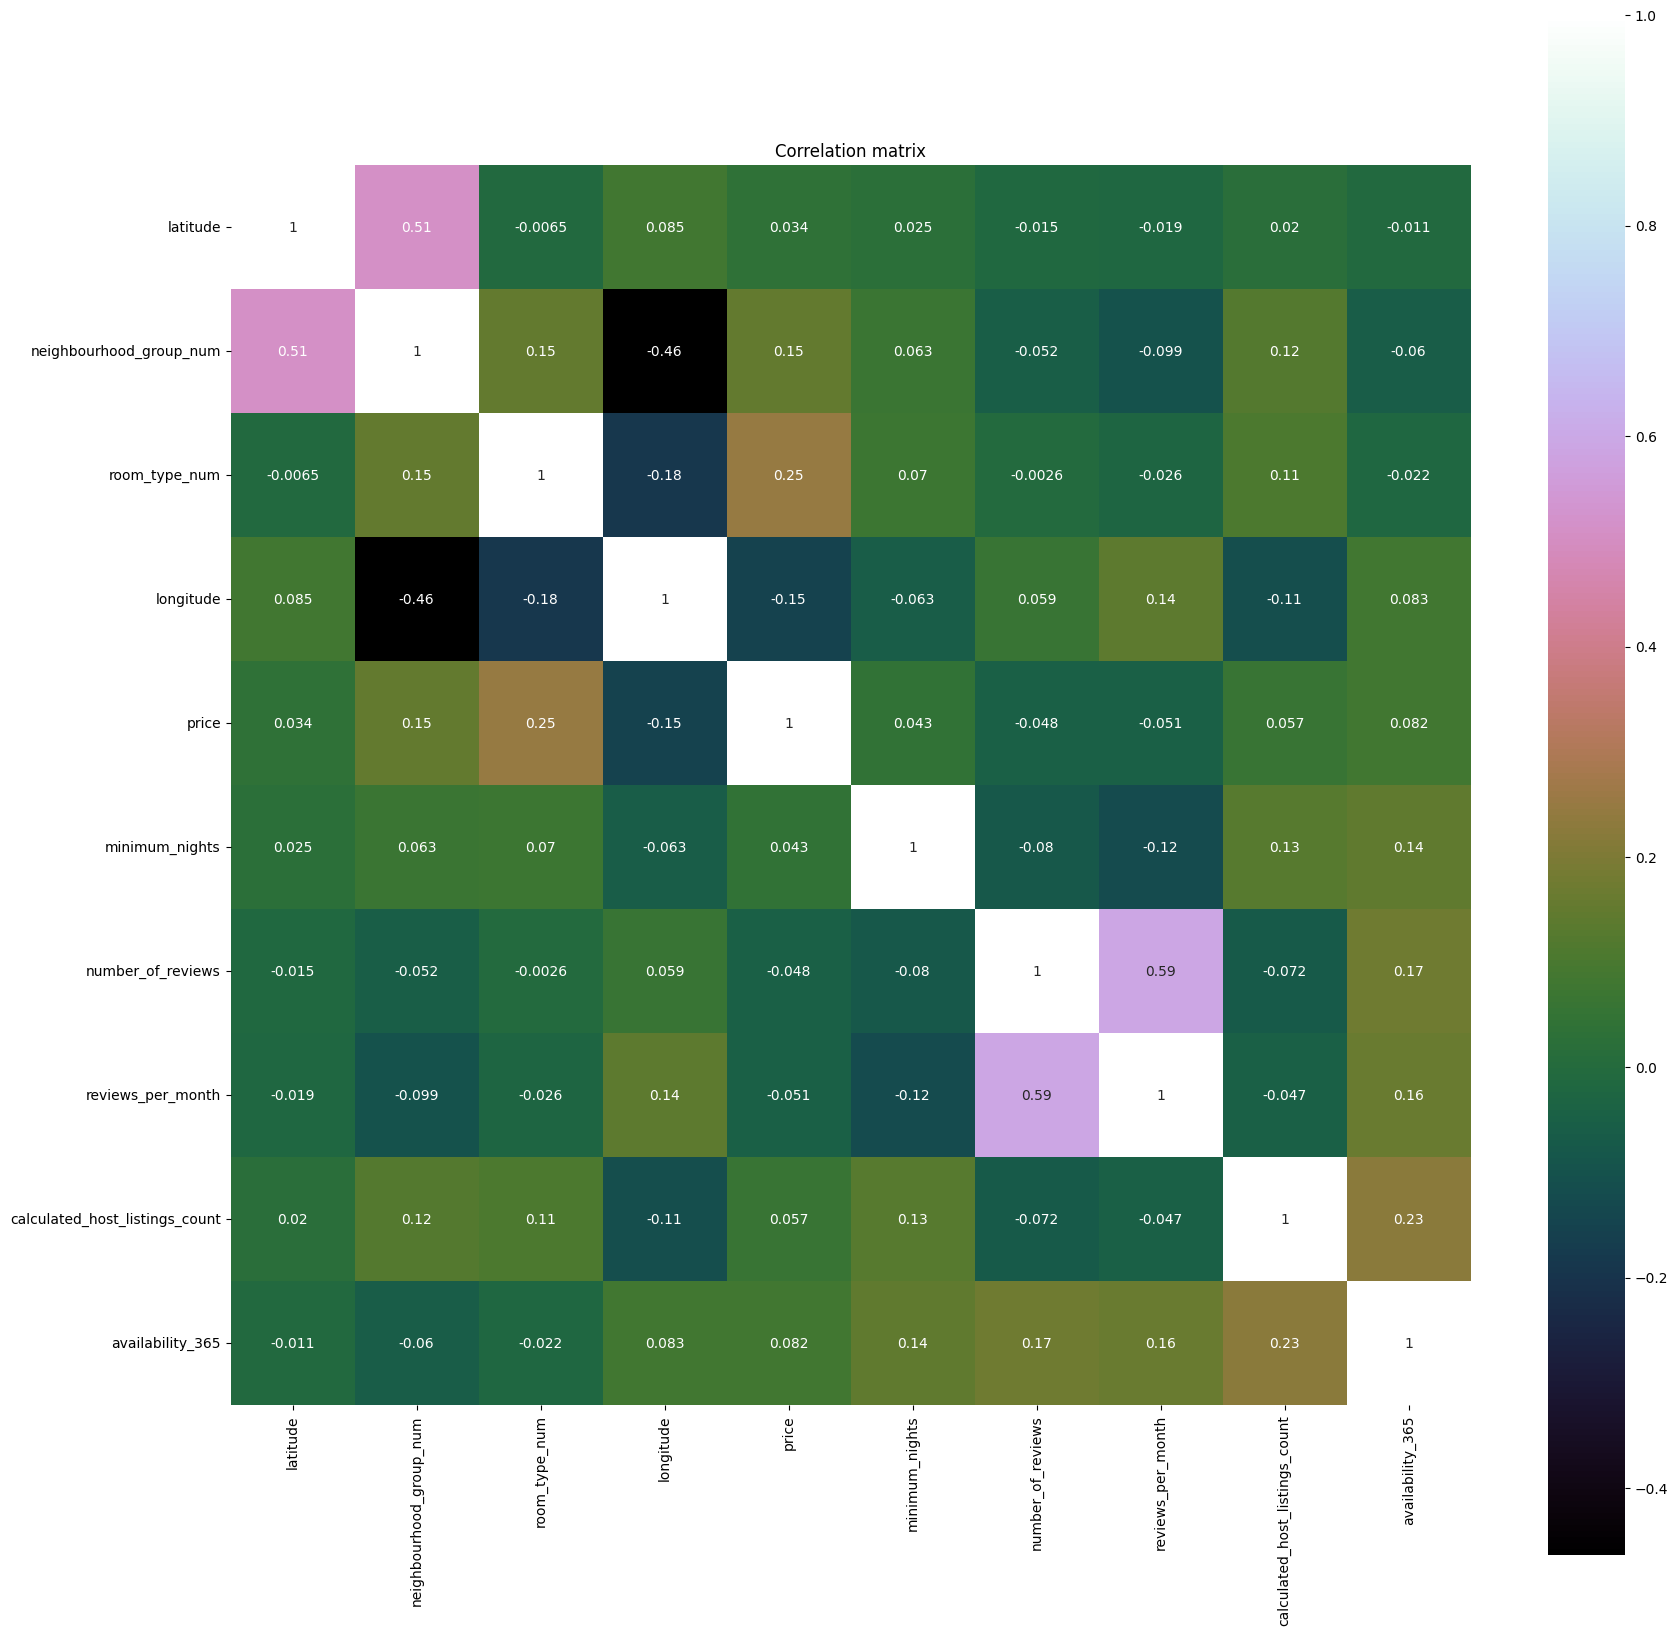

In [11]:
# Resolver acá'
import matplotlib.pyplot as plt
import seaborn as sns
airbnb_var = airbnb[['latitude', 'neighbourhood_group_num', 'room_type_num' ,'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
correlation = airbnb_var.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation matrix')

#### Ejercicio 3
Respondan las siguientes preguntas: ¿Cuál es la proporción de oferentes por “Neighbourhood group”? ¿Y por tipo de habitación? Además, realicen gráficos para mostrar estas composiciones y comenten los resultados.

Idea: Histograma (chequear si es por habitación en gral o por habitación dentro del neighbourhood group)

neighbourhood_group
Bronx            0.022300
Brooklyn         0.411129
Manhattan        0.443106
Queens           0.115835
Staten Island    0.007631
Name: offer_group, dtype: float64


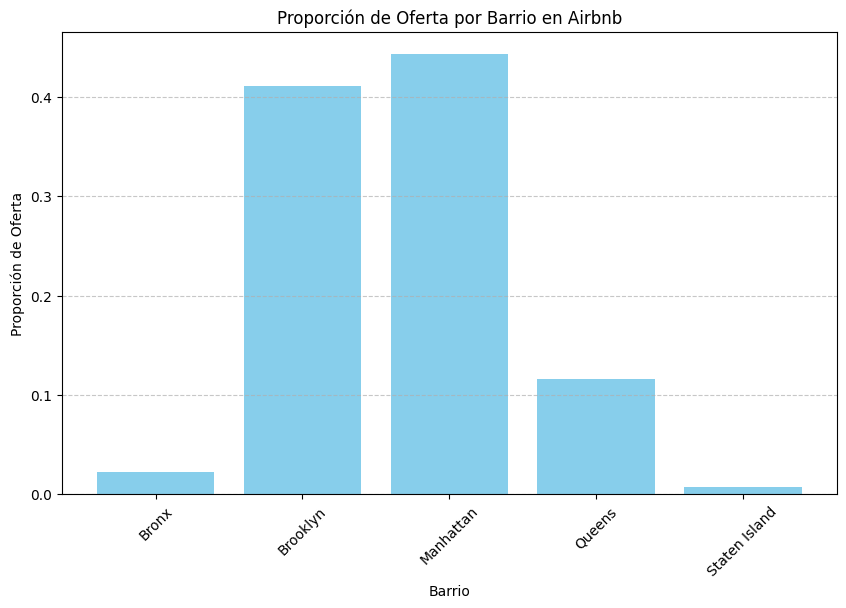

In [12]:
# Resolver acá
total_oferentes = 48880  # Definimos la variable total de oferentes

# Calcular la suma de oferta por cada barrio
oferta_por_barrio = airbnb.groupby('neighbourhood_group')['offer_group'].first()

# Calcular la proporción de oferta por cada barrio
proporcion_oferta = oferta_por_barrio / total_oferentes
print(proporcion_oferta)

# Crear un gráfico de barras con la proporción de oferta por barrio
plt.figure(figsize=(10, 6))
plt.bar(proporcion_oferta.index, proporcion_oferta.values, color='skyblue')
plt.xlabel('Barrio')
plt.ylabel('Proporción de Oferta')
plt.title('Proporción de Oferta por Barrio en Airbnb')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


         room_type  offer_room
0  Entire home/apt       25401
1     Private room       22319
2      Shared room        1160
room_type
Entire home/apt    0.519660
Private room       0.456608
Shared room        0.023732
Name: offer_room, dtype: float64


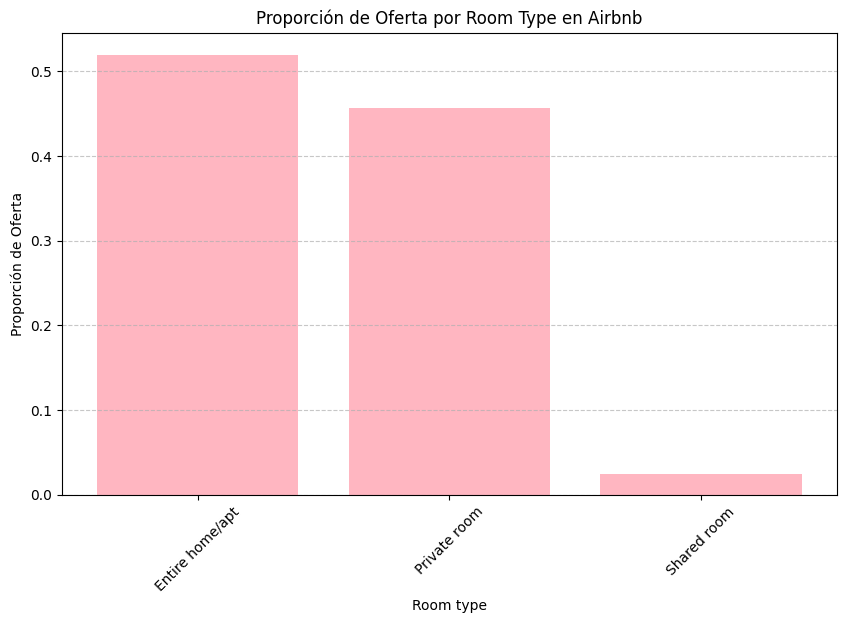

In [13]:
#agrupar por 'room_type' y contar la cantidad de oferentes por cada grupo
offer_per_room = airbnb.groupby('room_type').size().reset_index(name='offer_room')

# Paso 2: Hacer un merge o join con el DataFrame original para añadir la columna 'offer_room'
airbnb = airbnb.merge(offer_per_room, on='room_type', how='left')
print(offer_per_room)
airbnb

# Calcular la suma de oferta por tipo de habitación
oferta_por_roomtype = airbnb.groupby('room_type')['offer_room'].first()

# Calcular la proporción de oferta por tipo de habitación
proporcion_por_roomtype = oferta_por_roomtype / total_oferentes
print(proporcion_por_roomtype)

# Crear un gráfico de barras con la proporción de oferta por tipo de habitación
plt.figure(figsize=(10, 6))
plt.bar(proporcion_por_roomtype.index, proporcion_por_roomtype.values, color='lightpink')
plt.xlabel('Room type')
plt.ylabel('Proporción de Oferta')
plt.title('Proporción de Oferta por Room Type en Airbnb')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Ejercicio 4
Realicen un histograma de los precios de los alojamientos. Comenten el gráfico obtenido. Además, respondan las siguientes preguntas: ¿cuál es el precio mínimo, máximo y promedio? ¿Cuál es la media de precio por “Neighbourhood group” y por tipo de habitación? 

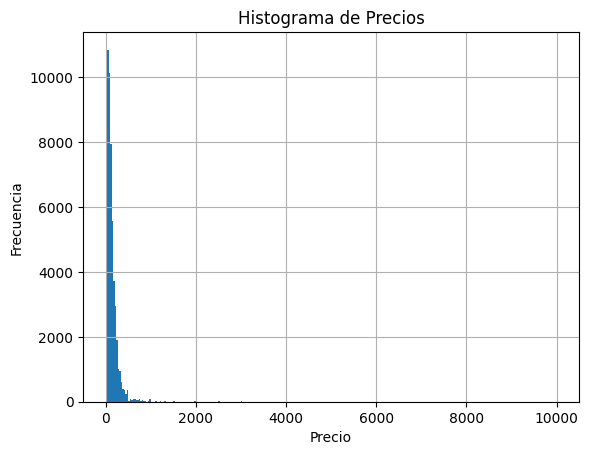

In [15]:
# Resolver acá
airbnb['price'].hist(bins=300)  # Puedes ajustar el número de bins si lo prefieres

# Mostrar el histograma
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios')
plt.show()

In [18]:
precios = airbnb['price']
print('El precio máximo es:', max(precios))
print('El precio mínimo es: ', min(precios))
print('El precio promedio es: ', np.mean(precios)) 

El precio máximo es: 10000.0
El precio mínimo es:  0.0
El precio promedio es:  152.74812237798014


In [21]:
#Media de precio por neigbourhood_group
precios_agrupados = airbnb.groupby('room_type')['price'].agg(['mean'])
print(precios_agrupados)

precios_barrio = airbnb.groupby('neighbourhood_group')['price'].agg(['mean'])
print(precios_barrio)

                       mean
room_type                  
Entire home/apt  211.825130
Private room      89.792371
Shared room       70.127586
                           mean
neighbourhood_group            
Bronx                 87.425551
Brooklyn             124.398775
Manhattan            196.885800
Queens                99.555477
Staten Island        114.812332


#### Ejercicio 5
Realicen dos scatter plots con dos variables de interés en cada uno. Comenten.

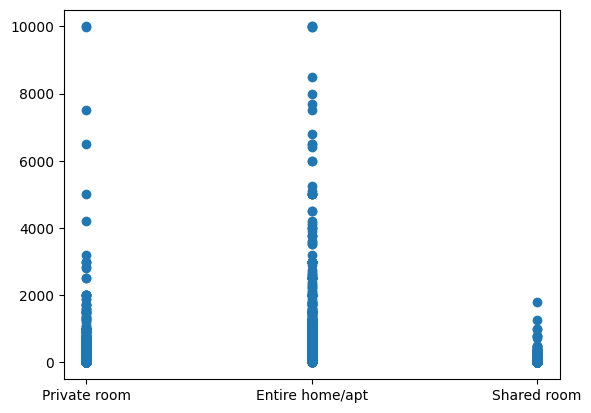

In [22]:
# Resolver acá

plt.scatter(airbnb['room_type'],airbnb['price'])

#### Ejercicio 6
Utilicen el análisis de componentes principales para graficar las variables en dos dimensiones. Comenten los resultados obtenidos (qué porcentaje de la varianza se logra explicar con dos componentes, cómo son los *loadings*, si ven algún patrón en el gráfico).

In [25]:
# Resolver acá
# Inicializamos el transformador 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
scaler = StandardScaler(with_std=True, with_mean=True)
# Aplicamos fit_transform al DataFrame
airbnb_transformed = pd.DataFrame(scaler.fit_transform(airbnb_var), columns=airbnb_var.columns)
pca = PCA()
airbnb_pca = pca.fit_transform(airbnb_transformed) 
# % de la Varianza explicada por los componentes 
print("Varianza explicada:", pca.explained_variance_ratio_)
# Loadings vectors
loading_vectors = pca.components_ # cada fila corresponde a un CP y cada columna, a una variable
print("Loadings:\n", pca.components_)
print("Loadings del CP1:\n",pca.components_[0]) 
pca.components_[0,0] #loadings del CP1 variable 1


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### Parte III: Predicción

El objetivo de esta parte del trabajo es intentar predecir los precios de los alojamientos.

#### Ejercicio 8
Partan la base en una base de prueba (test) y una de entrenamiento (train) utilizando el comando <code>train_test_split</code>. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (*random state instance*) debe ser 201. Establezca a price como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables ser´an las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [ ]:
# Resolver acá


#### Ejercicio 9
Implementen una regresión lineal y comenten los resultados obtenidos.

In [ ]:
# Resolver acá
